Dataset sourced from:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### **Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy.lib.utils import issubdtype
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

### **Loading the dataset from google drive and extracting important information for analyzing the data**

In [2]:
#Read csv file from google drive
# life_expectancy = "https://drive.google.com/file/d/150IvqurAB54pN6nDIGwcwONVMLqmT6bw/view?usp=sharing"
# life_expectancy = 'https://drive.google.com/uc?id=' + life_expectancy.split('/')[-2]
# df = pd.read_csv(life_expectancy)
# df

In [3]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Getting basic and important information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# checking the size of the data frame to get the number of rows and columns and populating them into variables for later use
(num_rows, num_cols) = df.shape
num_rows, num_cols

(2938, 22)

In [6]:
# Renaming the column names for ease of use
df.rename(columns={'Country': 'country', 
                   'Year': 'year', 
                   'Status': 'status', 
                   df.columns[3]: 'life_expectancy', 
                   df.columns[4]: 'adult_mortality', 
                   df.columns[5]: 'infant_deaths', 
                   'Alcohol': 'alcohol', 
                   df.columns[7]: 'percentage_expenditure', 
                   df.columns[8]: 'hepatitis_b', 
                   df.columns[9]: 'measles',
                   df.columns[10]: 'bmi', 
                   df.columns[11]: 'under_five_deaths',
                   'Polio': 'polio', 
                   df.columns[13]: 'total_expenditure', 
                   df.columns[14]: 'diphtheria', 
                   df.columns[15]: 'hiv_aids', 
                   'GDP': 'gdp', 
                   'Population': 'population', 
                   df.columns[18]: 'thinness_10_19_years', 
                   df.columns[19]: 'thinness_5_9_years', 
                   df.columns[20]: 'income_composition_of_resources', 
                   'Schooling': 'schooling'}, inplace=True)
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_10_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

### Brief description of each of the columns in the dataset and what the metric is used for.
1. Country information relates to countries of the world.There is information for totally 193 countries in the dataset. The dataset is unable to provide information for all countries on the world map. For example, there is no data for Andorra, Holy See or Italy.

In [7]:
df.loc[df['country'] == 'Germany']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
994,Germany,2015,Developed,81.0,68.0,2,NaN,0.000000,88.0,2464,...,94.0,NaN,95.0,0.1,41176.88158,81686611.0,1.1,1.1,0.924,17.1
995,Germany,2014,Developed,89.0,69.0,2,11.03,941.756291,88.0,443,...,94.0,11.30,95.0,0.1,4792.65288,89825.0,1.1,1.1,0.920,17.0
996,Germany,2013,Developed,86.0,71.0,2,10.94,895.877950,88.0,1771,...,94.0,11.16,95.0,0.1,4653.91143,864565.0,1.1,1.1,0.919,16.9
997,Germany,2012,Developed,86.0,71.0,2,11.18,839.913320,88.0,166,...,94.0,1.99,95.0,0.1,4465.24891,8425823.0,1.1,1.1,0.916,16.9
998,Germany,2011,Developed,85.0,74.0,2,11.20,869.790735,88.0,1607,...,94.0,1.93,95.0,0.1,4681.32796,8274983.0,1.1,1.1,0.912,16.8
999,Germany,2010,Developed,81.0,76.0,2,11.20,7584.078579,88.0,780,...,94.0,11.25,95.0,0.1,41785.55691,8177693.0,1.1,1.1,0.907,16.7
1000,Germany,2009,Developed,80.0,79.0,2,11.22,7641.270645,88.0,574,...,95.0,11.40,96.0,0.1,41732.77250,819237.0,1.1,1.1,0.906,16.7
1001,Germany,2008,Developed,79.9,8.0,2,11.36,8285.264655,87.0,917,...,95.0,1.39,96.0,0.1,45699.19832,821197.0,1.1,1.1,0.903,16.6
1002,Germany,2007,Developed,79.8,82.0,3,11.50,7777.556353,86.0,567,...,95.0,1.18,96.0,0.1,41814.81910,82266372.0,1.1,1.1,0.898,16.6
1003,Germany,2006,Developed,79.6,84.0,3,11.76,6407.535954,87.0,2307,...,94.0,1.34,96.0,0.1,36447.87232,82376451.0,1.1,1.1,0.892,16.5


2. The second column gives the years for which the data is available of each of the 193 countries. We have data available for various years from 2000 - 2015 but not for all the years.

3. The third column talks about the status of a country whether it is developed or developing.
For example: out of 193 countries, only 32 countries are developed.

In [8]:
dev_countries = df.loc[df['status'] == 'Developed']
dev_countries.country.nunique()

32

4. The fourth column talks about life expectancy for each of the countries for the years the data is available. It is also our target variable.

What is life expectancy?
Life expectancy refers to the average time a person might live. In this case, we are talking about what would be the average life span of a person based on other factors such as country they live in, alcohol consumption, immunization for the world's most prevalent illness such as Hepatitis, Polio and Diptheria. We wish the dataset had Tuberculosis data, unfortunately it does not.

The life expectancy in this data set is a number from 36.3 to 89 where average age is considered.

In [9]:
min_age = df.life_expectancy.min()
max_age = df.life_expectancy.max()

print(" Minimum average age of a person is:{} and maximum average age of a person is:{}" .format(min_age, max_age))


 Minimum average age of a person is:36.3 and maximum average age of a person is:89.0


5. Adult mortality according to the world World Development Indicators (WDI) database gives the probability of those who have reached age 15 will die before reaching age 60 (shown per 1,000 persons).

In [10]:
df.loc[(df['country'] == 'Japan') & (df['year'] ==2015)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1314,Japan,2015,Developed,83.7,55.0,2,NaN,0.0,NaN,35,...,99.0,NaN,96.0,0.1,34474.13736,127141.0,2.1,1.8,0.902,15.3


For instance the above cell implies that for Japan which is a developed country and is a country which is fondly referred to as the 'Ikigai' country. We have life expectancy of 83.7 which is the age till which an average person lives and adult mortality of 55. Adult mortality refers to the number of people who are >= 15 years of age and live up to be 60 years. It is measured per 1000. For example, for every 1000 people in the population 55 people who reach age 15 and die before reaching age 60.

6. Infant deaths also known as infant mortality. It refers to the number of infants who die before reaching their first birthday. It is measured for every 1000 live births.

In [11]:
df.loc[(df['country'] == 'Japan') & (df['year'] ==2010)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1319,Japan,2010,Developed,83.0,62.0,3,6.9,863.006149,NaN,450,...,98.0,9.58,97.0,0.1,4457.67639,1287.0,1.9,1.6,0.879,15.1


For example, in year 2010, for every 1000 children born, the number of infants who died before they turned 1 year old was 3.

In [12]:
df_japan_infant_deaths = df[(df['country'] == 'Japan') & (df['year'] < 2015)]
df_japan_infant_deaths = df_japan_infant_deaths[["year", "infant_deaths"]]
df_japan_infant_deaths

,year,infant_deaths
1315,2014,2
1316,2013,2
1317,2012,2
1318,2011,3
1319,2010,3
1320,2009,3
1321,2008,3
1322,2007,3
1323,2006,3
1324,2005,3


7. Alcohol refers to the alcohol consumption per capita. It is defined as the total amount of alcohol consumed per person (15 years of age or older) over a calendar year, in litres of pure alcohol - it includes both recorded and unrecorded consumption. How they record unrecorded consumption is still a mystery!

In [13]:
df.loc[(df['country'] == 'Afghanistan') & (df['year'] ==2015)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


For example, Afghanistan recorded 0.01 litres of alcohol consumed per person aged 15 or above (actually 18 or above considering legal age) - for year 2015.

In [14]:
df_developing_countries_alcohol_consumption = df.loc[(df['year'] ==2015) & (df['status'] =='Developed') & (df['country'] == 'Singapore')]
df_developing_countries_alcohol_consumption
#df_developing_countries_alcohol_consumption_df = df_developing_countries_alcohol_consumption[["country", "alcohol"]]
#df_developing_countries_alcohol_consumption_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
2313,Singapore,2015,Developed,83.1,55.0,0,1.79,0.0,96.0,0,...,96.0,NaN,96.0,0.1,53629.73746,NaN,2.2,2.2,0.924,15.4


8.Percentage_expenditure refers to percentage of GDP that is spent on heathcare related expenses. GDP is the gross domestic product per capita which is the total income of a country divided by the total number of inhabitants (ideally mid year population). 

In [15]:
df.loc[(df['country'] == 'Japan') & (df['year'] ==2010)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1319,Japan,2010,Developed,83.0,62.0,3,6.9,863.006149,NaN,450,...,98.0,9.58,97.0,0.1,4457.67639,1287.0,1.9,1.6,0.879,15.1


For example, the percentage expenditure for Japan in 2010 was 863. Japan had a GDP of 5.759 trillion USD and a population of 128.1 million which roughly translates to 44,968.16 USD as per capita GDP. This is approximately 8.63-9%. The number is multiplied by 100 for scaling purposes.

9. Hepatitis_B vaccination refers to the immunization coverage for 1-year-olds. It is expressed as a percentage. For instance the below value for Germany for year 2012 is 88. Which means that 88% of the infants around the age of 1 were vaccinated against Hepatitis. However, this data is not available for all countries for all the years in consideration.

In [16]:
df.loc[(df['country'] == 'Germany') & (df['year'] ==2012)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
997,Germany,2012,Developed,86.0,71.0,2,11.18,839.91332,88.0,166,...,94.0,1.99,95.0,0.1,4465.24891,8425823.0,1.1,1.1,0.916,16.9


In [17]:
#understanding the values in immunization Hepatitis, Polio and Diphtheria
df.hepatitis_b.unique()
#immunization coverage among 1-year-olds (%) - refers to the percentage of immunizations for hepatities for 1 year olds

array([65., 62., 64., 67., 68., 66., 63., 99., 98., 97., 96., 95., 94.,
       91.,  9.,  8., 83., 81., nan, 77., 75., 72., 61., 69., 73., 85.,
       84., 88., 93., 89., 78., 55., 92., 86., 44., 33., 74., 52., 49.,
        5., 51., 21., 45., 11., 87., 18., 56.,  7.,  6., 76., 82., 79.,
       15., 36., 48.,  1.,  4., 42., 28., 14., 47., 23., 46., 37., 39.,
       24., 17., 27., 25., 16.,  2., 35., 29., 26., 54., 57., 38., 59.,
       71., 43., 58., 41., 31., 12., 32., 22., 53., 19.])

10. Measles column refers to number of people reported for measles infection every 1000 people of a country's population. For example, the below code shows that for every 1000 people in Austria, 70 were affected by measles.

In [18]:
df.loc[(df['country'] == 'Australia') & (df['year'] ==2010)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.2,92.0,0.1,51874.848,223175.0,0.7,0.6,0.927,19.5


11. BMI column refers to percentage of people in the population that are overweight.

In [19]:
min_bmi = df.bmi.min()
max_bmi = df.bmi.max()

print(" Minimum percentage of overweight bmi for a country is:{} and maximum percentage of overweight bmi for a country is:{}" .format(min_bmi, max_bmi))

 Minimum percentage of overweight bmi for a country is:1.0 and maximum percentage of overweight bmi for a country is:87.3


12. Child mortality also referred to as the under 5 deaths is the probability a child dies between birth and 5 years of age. It is expressed per 1000 live births. The below table explains that 970 children survived for every 1000 children born in the United States between birth and 5.

In [20]:
under_5_df = df.loc[(df['country'] == 'United States of America') & (df['year'] ==2010)]
under_5_df
under_5_df[['country', 'under_five_deaths', 'year']]

,country,under_five_deaths,year
2799,United States of America,30,2010


13. Polio vaccination refers to the immunization coverage for 1-year-olds. It is expressed as a percentage. For instance the below value for Germany for year 2011 is 94. Which means that 94% of the infants around the age of 1 were vaccinated against Polio. However, this data is not available for all countries for all the years in consideration.

In [21]:
df.loc[(df['country'] == 'Germany') & (df['year'] ==2011)]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
998,Germany,2011,Developed,85.0,74.0,2,11.2,869.790735,88.0,1607,...,94.0,1.93,95.0,0.1,4681.32796,8274983.0,1.1,1.1,0.912,16.8


In [22]:
df.polio.unique()
#immunization coverage among 1-year-olds (%) - refers to the percentage of immunizations for polio for 1 year olds

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

14. Total expenditure refers to the general government spending on health as a percent of total government spending.
For example the value of total expenditure is 8.52 for a country named Afghanistan, it means that the government of Afghanistan is spending 8.52% of its total spending in the health sector.

In [23]:
# Calculating mean of total_expenditure to get the most common percent of spending on health by a country
mean_total_expenditure = df.total_expenditure.mean()
print("Average of total expenditure values amongst all the countries is: ",round(mean_total_expenditure,2),"%")

Average of total expenditure values amongst all the countries is:  5.94 %


Above value means that on an average all countries have 5.92% of their total spendings spent in health sector.

15. Diphtheria column has values of immunization coverage of DTP3 vaccine among 1-year-olds across different countries and different years in percentage.

Average of diphtheria immunization across countries:  82.32 %


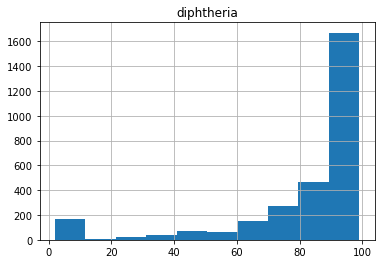

In [24]:
#Histogram plot to better understand the values of immunization across countries
df.hist(df.columns[14])
# Mean value of diphtheria immunization to get the amount of 1-year-olds immunization record percentage in most of the countries
diphtheria_mean = df.diphtheria.mean()
print("Average of diphtheria immunization across countries: ",round(diphtheria_mean,2),"%")

Since the mean for diphtheria is 82.3%, it signifies that on an average 82.3% of the people were vaccinated by DTP3 vaccine when they were 1-year-old for all the countries for a given year


16. Hiv/aids shows the percentage number of deaths for every 1000 live births in 0-4 years for every country.

In [25]:
# Calculating mean of values of deaths due to hiv_aids 
df.hiv_aids.mean()

1.7421034717494939

This means that on an average 1.74% of 1000 live births die due to hiv_aids between the age of 0-4 years.

17. GDP column shows the Gross Domestic Product per capita for every country for the year it was noted in USD.

In [26]:
min = df.gdp.min()
max = df.gdp.max()
mean = df.gdp.mean()
print("The minimum GDP for the dataset is: {} \nThe maximum GDP for the dataset is: {} \nThe mean of the GDPs in the dataset is: {}" .format(min,max,mean))

The minimum GDP for the dataset is: 1.68135 
The maximum GDP for the dataset is: 119172.7418 
The mean of the GDPs in the dataset is: 7483.158469138481


In [27]:
# Showing comparision of relation between gdp, total expenditure, and life expectancy
gdp = df[(df.gdp == 1.68135) | (df.gdp == 119172.7418)]
gdp[['country', 'life_expectancy', 'total_expenditure', 'gdp']]

,country,life_expectancy,total_expenditure,gdp
1539,Luxembourg,81.7,6.94,119172.74180
2036,Philippines,66.8,2.79,1.68135


Looking at above dataframe, it can be seen that - The more the GDP,  the better is the total expenditure and hence more the life expectancy

18. Population column shows the total population of the country as per the year the data was collected in

In [28]:
max = df.population.max()
min = df.population.min()
print("The minimum population in a country in the dataset is: {} \nThe maximum population in a country in the dataset is: {}" .format(min,max))

The minimum population in a country in the dataset is: 34.0 
The maximum population in a country in the dataset is: 1293859294.0


In [29]:
# Checking which countries have the least and the most population
population = df[(df.population == 34) | (df.population == 1293859294)]
population[['country', 'year', 'population']]

,country,year,population
1187,India,2014,1.293859e+09
1614,Maldives,2003,3.400000e+01


As seen in above dataframe, the country with the most population is India and the country with the least population is Maldives - although the years in which the data was collected are different

19. thinness_10_19_years signify the percentage of people aged 10-19 years suffering from thinness out of the total population of a country

In [30]:
min = df.thinness_10_19_years.min()
max = df.thinness_10_19_years.max()
print("The minimum and maximum percentge of the country population suffering from thinness in the age group of 10-19 years in a country in the dataset are: {}% and {}%" .format(min,max))

The minimum and maximum percentge of the country population suffering from thinness in the age group of 10-19 years in a country in the dataset are: 0.1% and 27.7%


20. thinness_5_9_years signify the percentage of children aged 5-9 years suffering from thinness out of the total population of a country

In [31]:
min = df.thinness_5_9_years.min()
max = df.thinness_5_9_years.max()
print("The minimum and maximum percentge of the country population suffering from thinness in the age group of 5-9 years in a country in the dataset are: {}% and {}%" .format(min,max))

The minimum and maximum percentge of the country population suffering from thinness in the age group of 5-9 years in a country in the dataset are: 0.1% and 28.6%


21. income_composition_of_resources represents human development index in terms of income composition of the resources in the country - index ranging from 0 to 1.

In [32]:
df.income_composition_of_resources.mean()

0.6275510645976166

The human development in terms of income composition of the resources is 63% for all the countries on an averge.

22. Schooling respresents number of years of an individual spent in schooling

In [33]:
df.schooling.mean()

11.992792792792786

On an average, each individual has spent 12 years in schooling in each country

In [34]:
#Checking unique values in categorical columns to encode later
unique_values_country = df['country'].nunique()
unique_values_year = df['year'].nunique()
unique_values_status = df['status'].nunique()
print("unique_values_country:", unique_values_country, "\nunique_values_year:", unique_values_year, "\nunique_values_status:", unique_values_status)
df

unique_values_country: 193 
unique_values_year: 16 
unique_values_status: 2


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


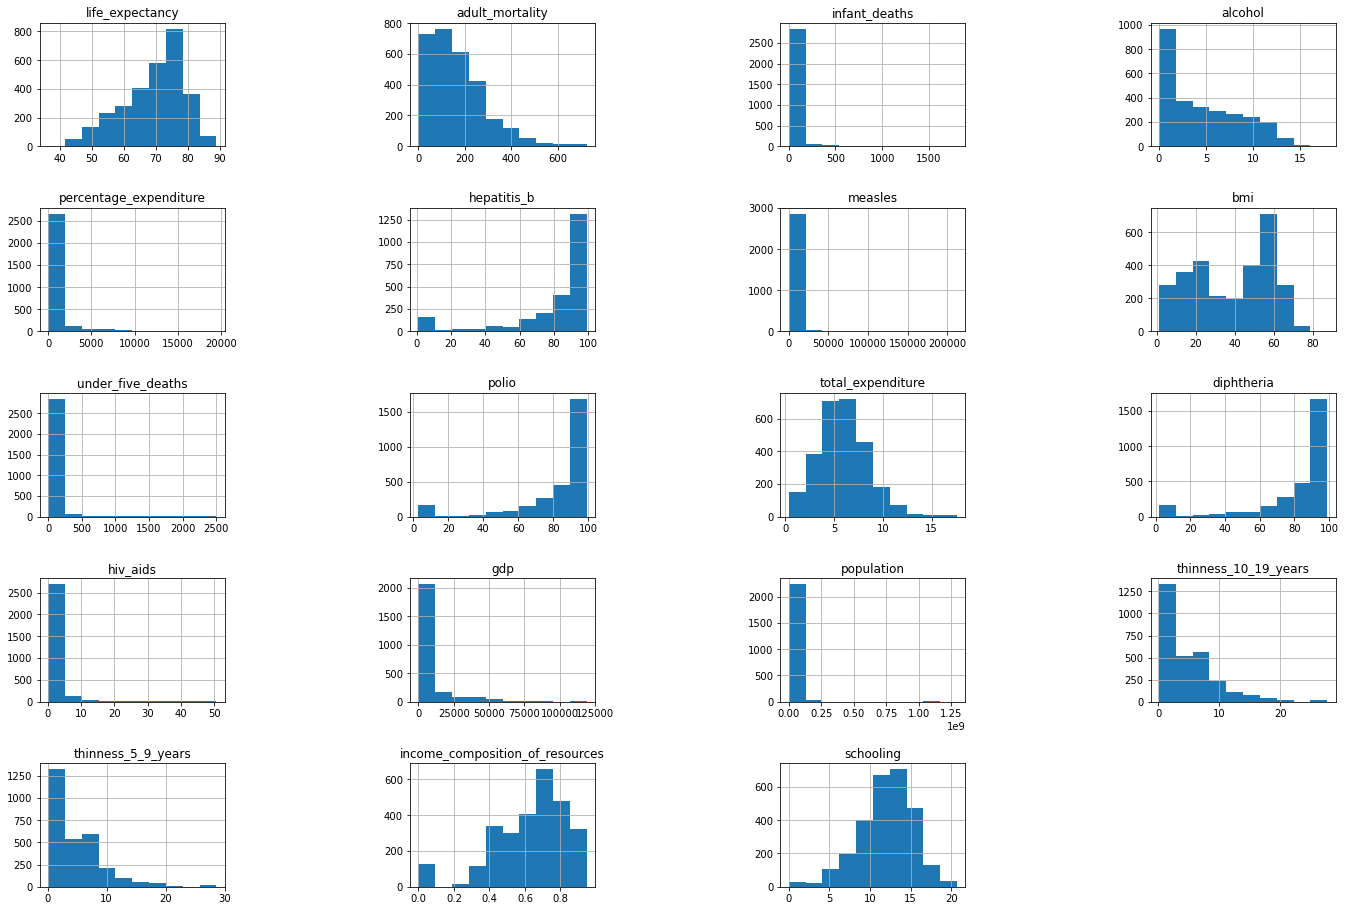

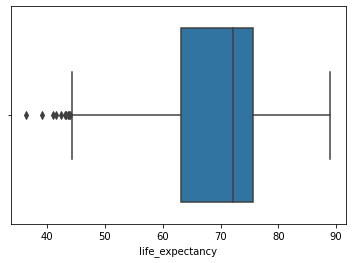

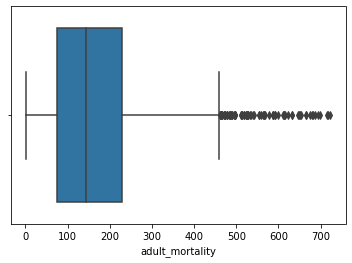

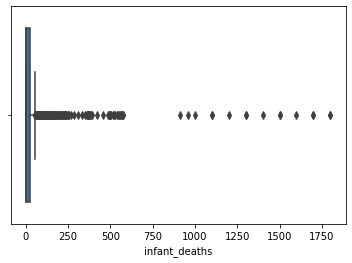

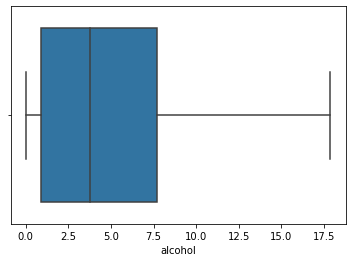

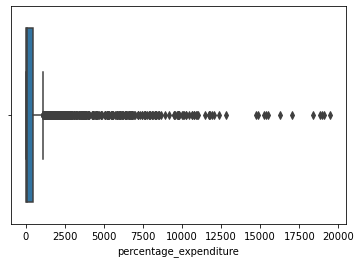

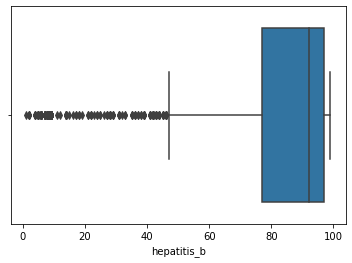

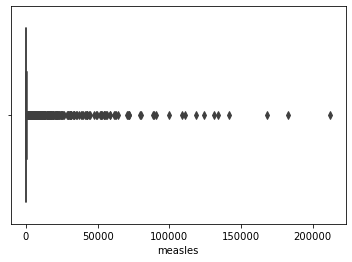

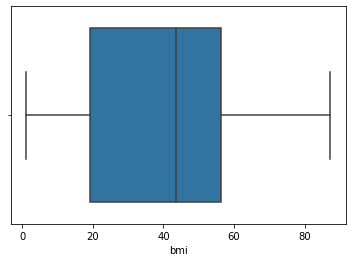

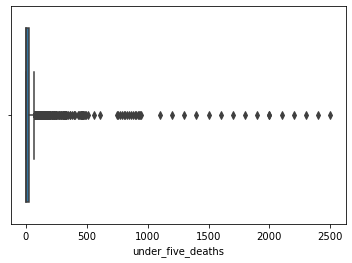

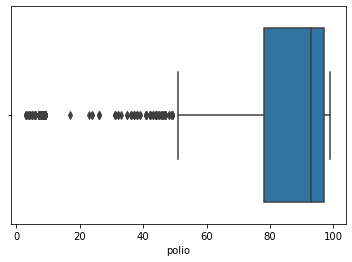

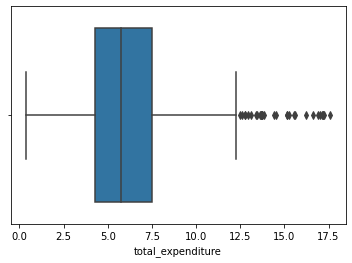

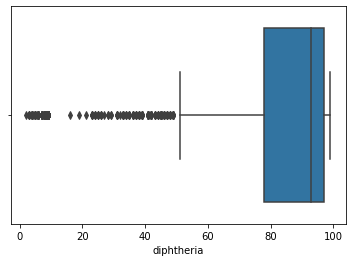

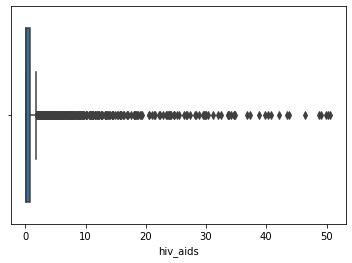

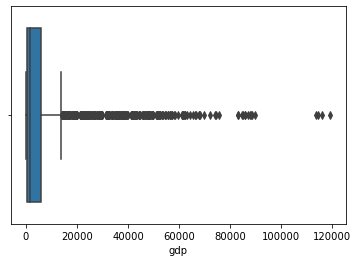

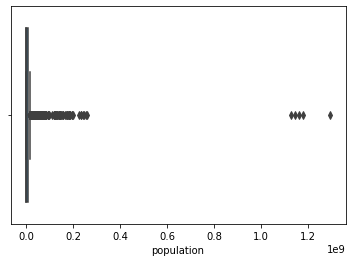

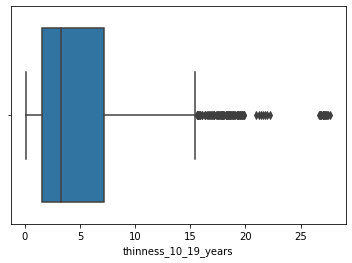

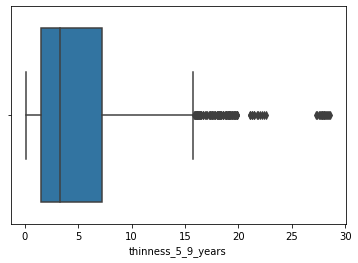

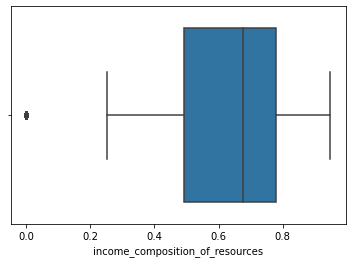

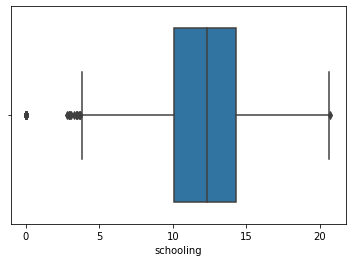

In [35]:
#Plotting histogram for all the numerical columns
df.hist(df.columns[3:]) #Selecting all the numerical columns

# Adjustments to the plots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=3,
                    wspace=1,
                    hspace=0.5)
plt.show()

#Plotting boxplot of each numerical column to see outliers
for column in df[df.columns[3:]]:
  #if issubdtype(df[column], np.number): #Uncomment if only numerical columns from a huge dataset are supposed to be plotted
    plt.figure()
    sns.boxplot(x=df[column])

As can be seen in the plots above, the histogram plots for all the features are skewed in either of the directions.

### Getting correlation of all the numerical values with each other and then with the target value - life_expectancy

In [36]:
#using a correlation matrix to visualize the correlations better with all variables and helps get an idea about what features can be used later
corr_with_heatmap = df.corr()
corr_with_heatmap.style.background_gradient(cmap = 'coolwarm')

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under_five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [37]:
# Getting correlation of all the numerical columns with the target column - life_expectancy
corr_with_life_expectancy=df.select_dtypes(include=np.number).corr()['life_expectancy']
corr_with_life_expectancy

year                               0.170033
life_expectancy                    1.000000
adult_mortality                   -0.696359
infant_deaths                     -0.196557
alcohol                            0.404877
percentage_expenditure             0.381864
hepatitis_b                        0.256762
measles                           -0.157586
bmi                                0.567694
under_five_deaths                 -0.222529
polio                              0.465556
total_expenditure                  0.218086
diphtheria                         0.479495
hiv_aids                          -0.556556
gdp                                0.461455
population                        -0.021538
thinness_10_19_years              -0.477183
thinness_5_9_years                -0.471584
income_composition_of_resources    0.724776
schooling                          0.751975
Name: life_expectancy, dtype: float64

In [38]:
#Converting the output of correlation to a dataframe and sorting the values of dataframe to ascending order for better
#visualization in the heatmap
corr_df = pd.DataFrame(corr_with_life_expectancy).sort_values(by=['life_expectancy'],ascending=True)
corr_df

,life_expectancy
adult_mortality,-0.696359
hiv_aids,-0.556556
thinness_10_19_years,-0.477183
thinness_5_9_years,-0.471584
under_five_deaths,-0.222529
infant_deaths,-0.196557
measles,-0.157586
population,-0.021538
year,0.170033
total_expenditure,0.218086


In [39]:
#Assigning index values of output of the dataframe to a variable called Index. This is done in order to record the names
#of the columns (adult_morality, hiv/aids, etc) before converting the dataframe to an array for plotting the heatmap
Index = corr_df.index
Index

Index(['adult_mortality', 'hiv_aids', 'thinness_10_19_years',
       'thinness_5_9_years', 'under_five_deaths', 'infant_deaths', 'measles',
       'population', 'year', 'total_expenditure', 'hepatitis_b',
       'percentage_expenditure', 'alcohol', 'gdp', 'polio', 'diphtheria',
       'bmi', 'income_composition_of_resources', 'schooling',
       'life_expectancy'],
      dtype='object')

In [40]:
#Converting dataframe to 2D array for plotting a heatmap
corr_with_life_expectancy=np.asarray(corr_with_life_expectancy).reshape(20,1)
corr_with_life_expectancy

array([[ 0.17003302],
       [ 1.        ],
       [-0.69635931],
       [-0.19655718],
       [ 0.40487676],
       [ 0.3818635 ],
       [ 0.25676195],
       [-0.1575858 ],
       [ 0.56769355],
       [-0.22252912],
       [ 0.46555581],
       [ 0.21808637],
       [ 0.47949486],
       [-0.55655625],
       [ 0.46145519],
       [-0.02153811],
       [-0.47718319],
       [-0.4715836 ],
       [ 0.72477598],
       [ 0.75197546]])

In [41]:
corr_df.index = Index
corr_df

,life_expectancy
adult_mortality,-0.696359
hiv_aids,-0.556556
thinness_10_19_years,-0.477183
thinness_5_9_years,-0.471584
under_five_deaths,-0.222529
infant_deaths,-0.196557
measles,-0.157586
population,-0.021538
year,0.170033
total_expenditure,0.218086


<AxesSubplot:>

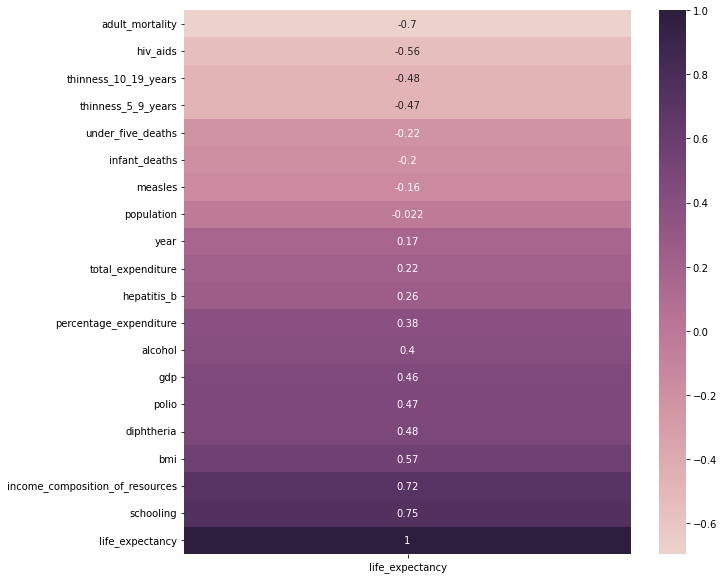

In [42]:
#Plotting heatmap to show correlation of every numeric feature with life_expectancy
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_df, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

<AxesSubplot:xlabel='Status', ylabel='Count'>

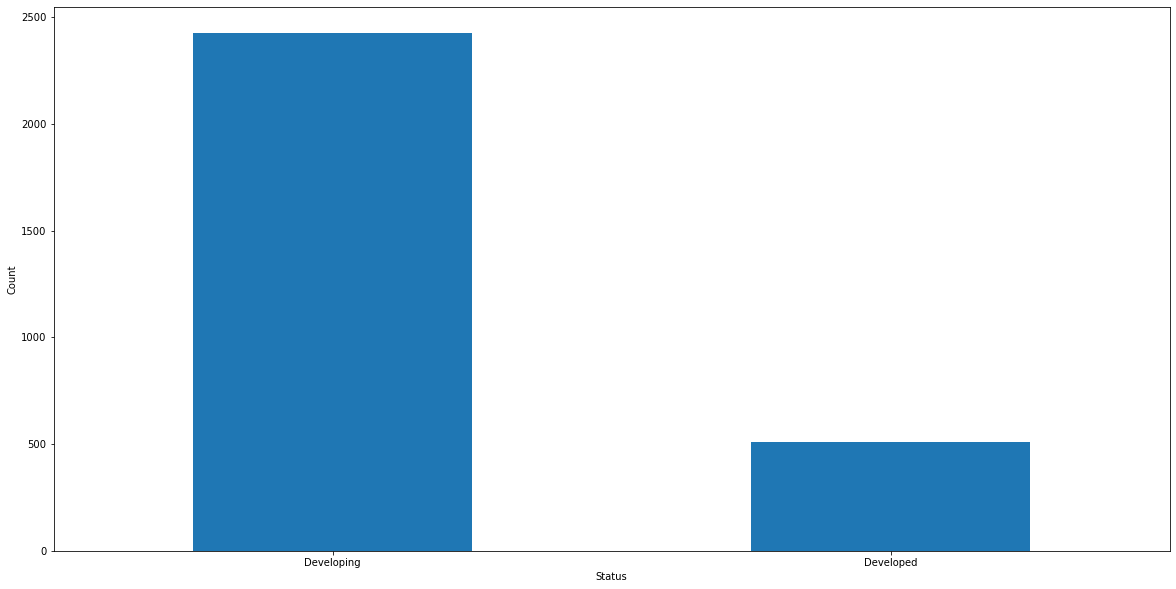

In [43]:
#Unique countries are 193
#The data is distributed equally for all the years in consideration
#Plotting bar plot for development status of the countries
df['status'].value_counts().plot(kind='bar', xlabel='Status', ylabel='Count',figsize=((20, 10)), rot=0)

### Preprocessing data

In [44]:
#Checking null values in the dataset
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_10_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [45]:
# If null percentage per column is greater than 30%, such a feature can be eliminated - a concept of dimentionality reduction. Calculating percentages.
(df.isna().sum()/ num_rows) * 100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under_five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv_aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_10_19_years                1.157250
thinness_5_9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

As seen above, none of the columns exceed 30% threshold for null values and hence we are not going to to remove any column for dimentionality reduction.

In [46]:
# Filling null values with median values of the data
df['life_expectancy'] = df['life_expectancy'].fillna(df['life_expectancy'].median())
df['adult_mortality'] = df['adult_mortality'].fillna(df['adult_mortality'].median())
df['alcohol'] = df['alcohol'].fillna(df['alcohol'].median())
df['hepatitis_b'] = df['hepatitis_b'].fillna(df['hepatitis_b'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['polio'] = df['polio'].fillna(df['polio'].median())
df['total_expenditure'] = df['total_expenditure'].fillna(df['total_expenditure'].median())
df['diphtheria'] = df['diphtheria'].fillna(df['diphtheria'].median())
df['gdp'] = df['gdp'].fillna(df['gdp'].median())
df['population'] = df['population'].fillna(df['population'].median())
df['thinness_10_19_years'] = df['thinness_10_19_years'].fillna(df['thinness_10_19_years'].median())
df['thinness_5_9_years'] = df['thinness_5_9_years'].fillna(df['thinness_5_9_years'].median())
df['income_composition_of_resources'] = df['income_composition_of_resources'].fillna(df['income_composition_of_resources'].median())
df['schooling'] = df['schooling'].fillna(df['schooling'].median())
# Verifying that no null values exist
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_10_19_years               0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

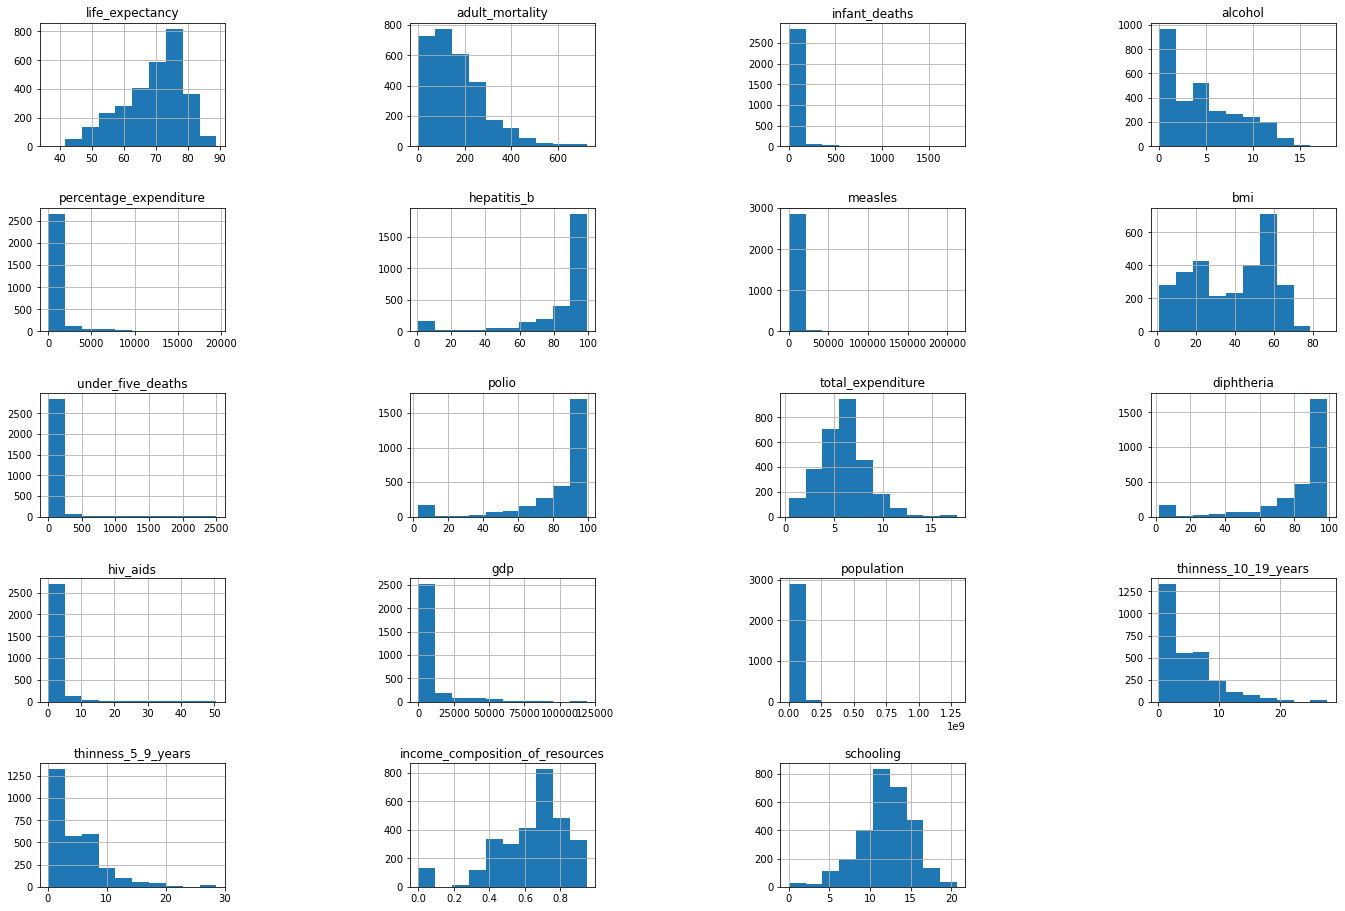

In [47]:
#Plotting histogram for all the numerical columns after removing null to see how it makes difference after imputing median values in place of null values
df.hist(df.columns[3:]) #Selecting all the numerical columns

# Adjustments to the plots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=3,
                    wspace=1,
                    hspace=0.5)
plt.show()

In [48]:
#Shape of the dataframe before removing outliers
df.shape

(2938, 22)

In [49]:
# Checking description of the dataframe
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [50]:
# Defining the list of numerical column names to use later
numerical_vars = list(df.columns)[3:]
numerical_vars

['life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_10_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [51]:
# Defining a function to get outlier count for each column
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [52]:
# Calling outlier_count function for every column in the list stored in numerical_vars variable to get number of outliers in each column 
for col in numerical_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant_deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 322
Percent of data that is outlier: 10.96%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------bmi---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under_five_deaths---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------polio---------------
Number of o

### Dealing with the Outliers

Every once in a while we come across data that has very few rows. A good example of that is the medical data. We cannot afford to waste more time trying to get more data, nor can we lose data during data cleaning for outliers. A unique method has been statistically determined for such cases and is known as the Winsorization. Winsorization refers to the practice of modifying the data points i.e. the outliers either to upper limit or lower limit. Theoretically in most cases, the data modified will depend on the percentage of outliers that need to be removed.

In [53]:
# Using Winsorization method to deal with Outliers
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
          plt.figure(figsize=(15,5))
          plt.subplot(121)
          plt.boxplot(df[col])
          plt.title('original {}'.format(col))
          plt.subplot(122)
          plt.boxplot(wins_data)
          plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
          plt.show()

Every once in a while we come across data that that has very few rows. A good example of that is the medical data. We cannot afford to waste more time trying to get more data, nor can we lose data during data cleaning for outliers. A unique method has been statistically determined for such cases and is known as the Winsorization. Winsorization refers to the practice of modifying the data points i.e. the outliers either to upper limit or lower limit. Theoretically in most cases, the data modified will depend on the percentage of outliers that need to be removed.

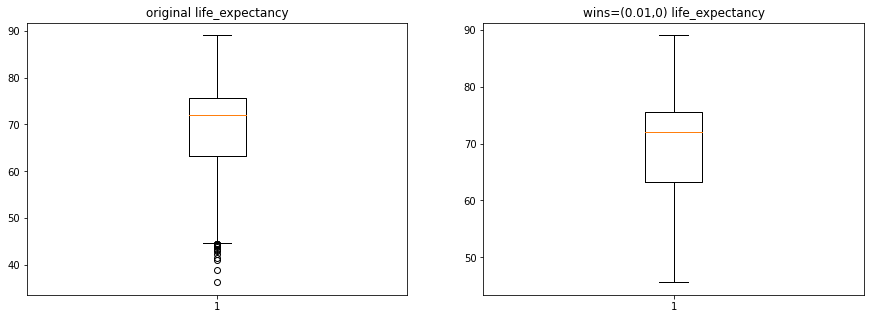

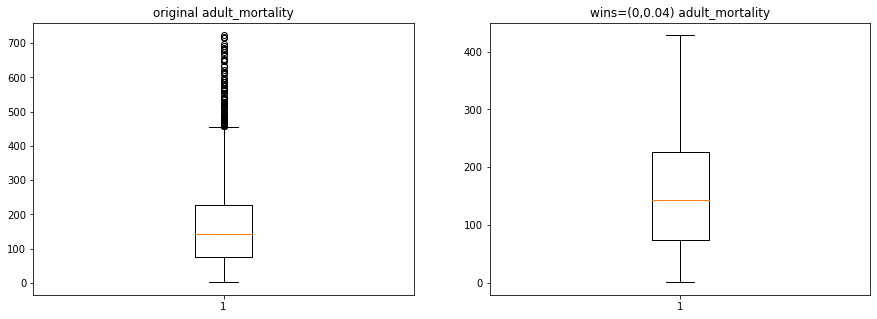

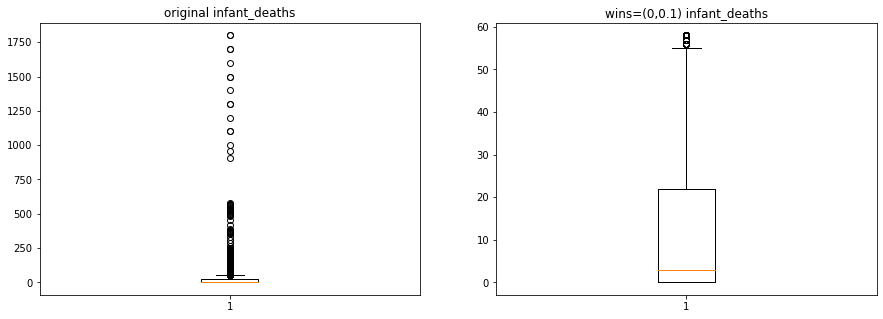

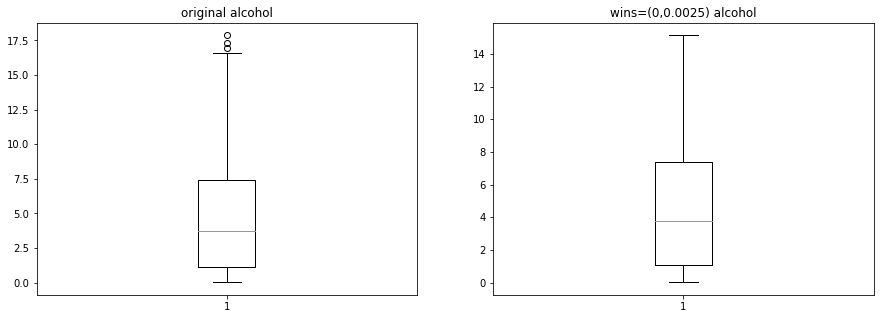

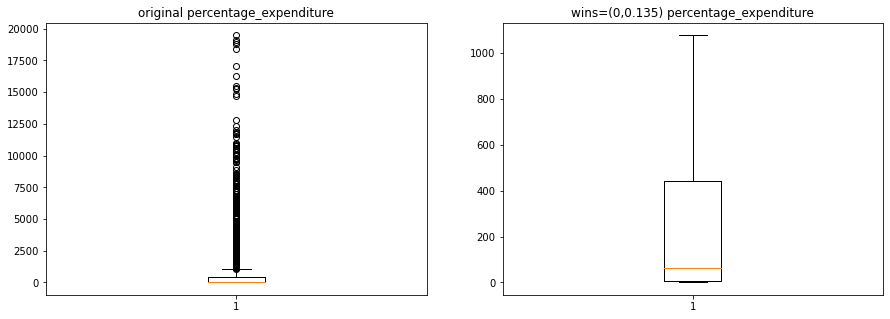

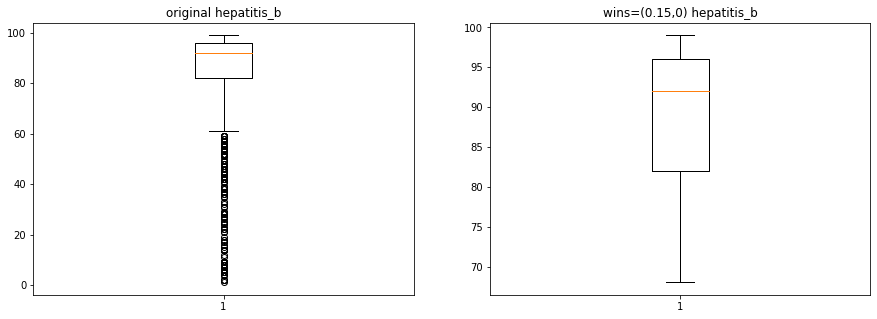

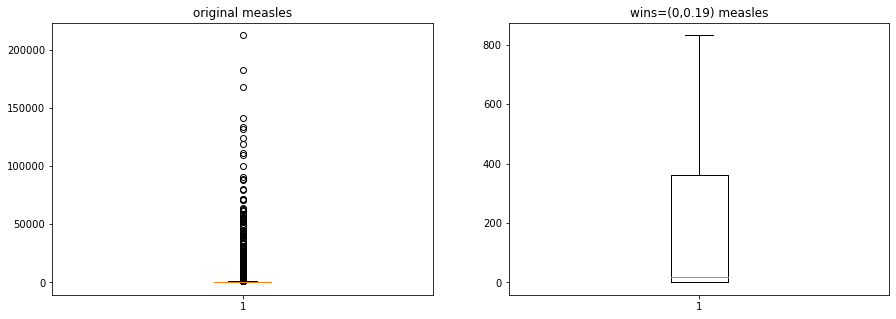

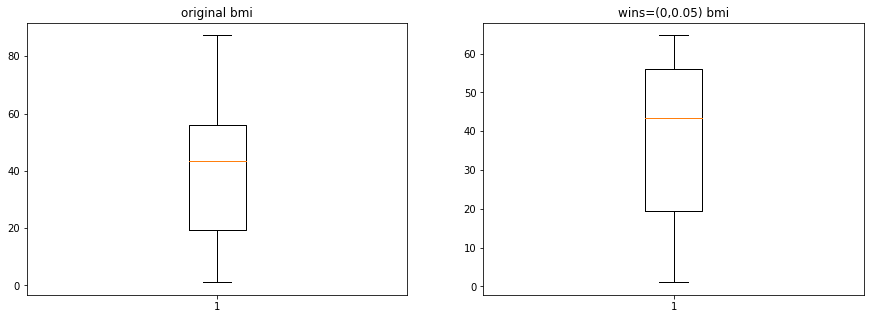

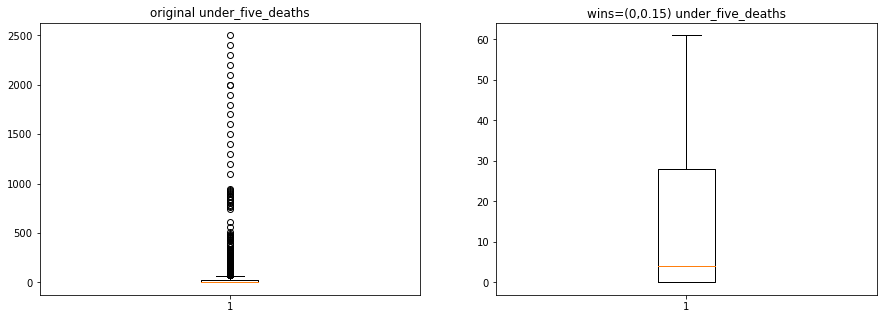

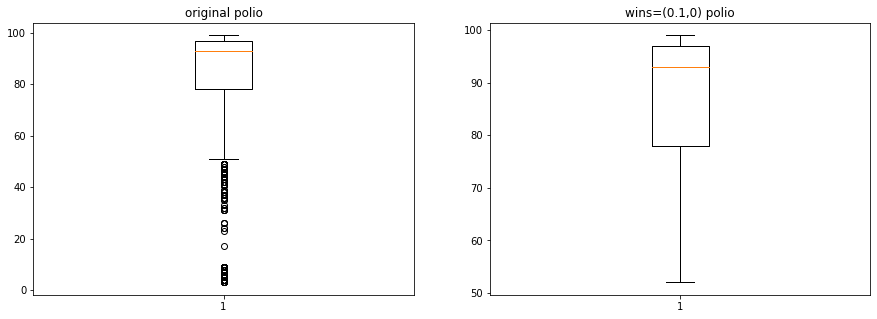

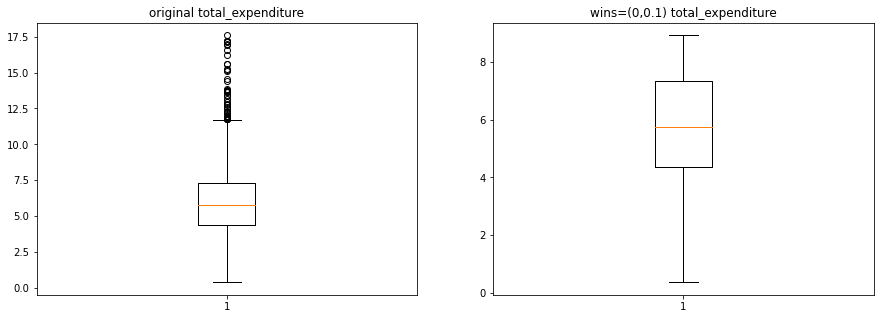

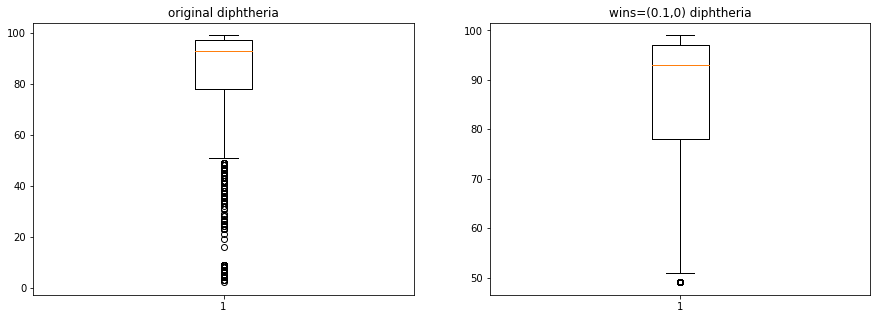

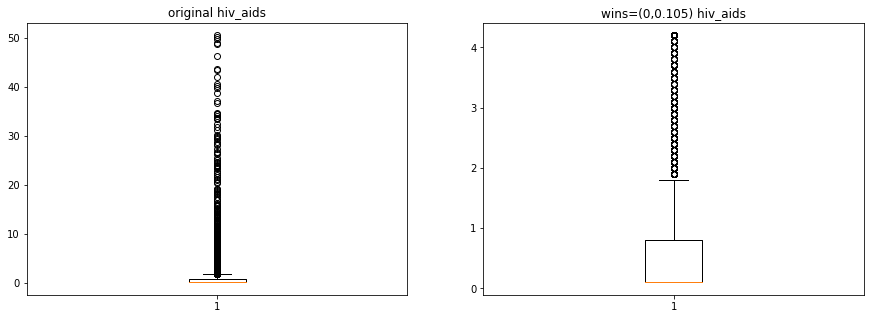

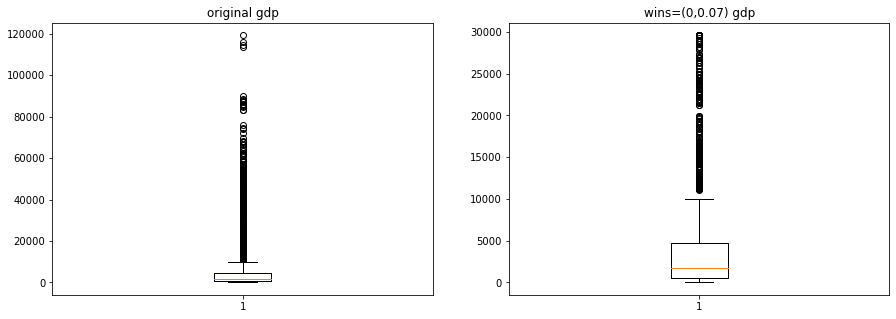

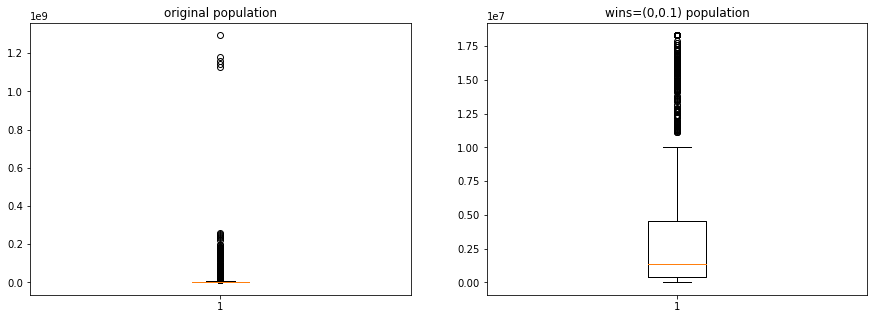

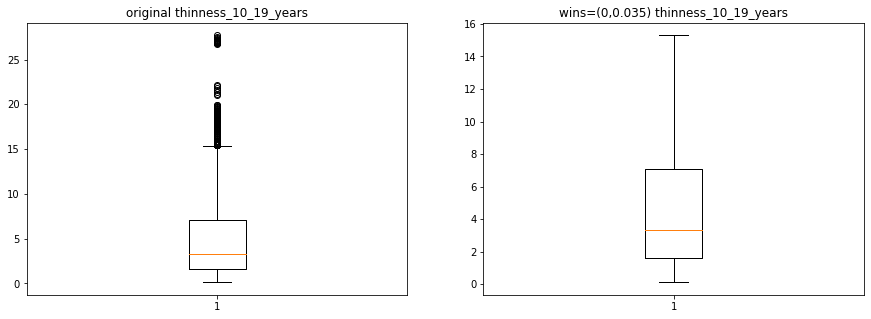

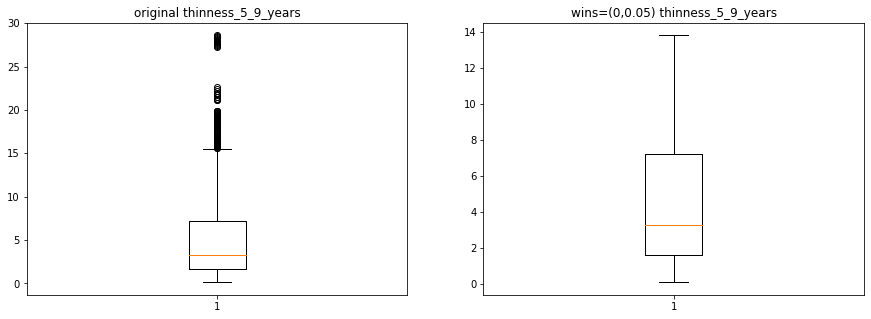

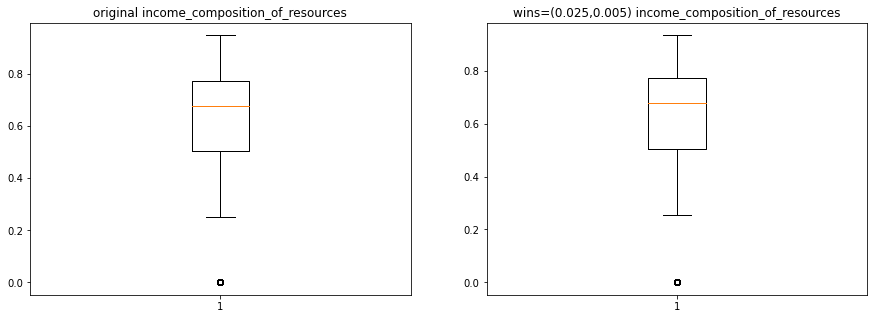

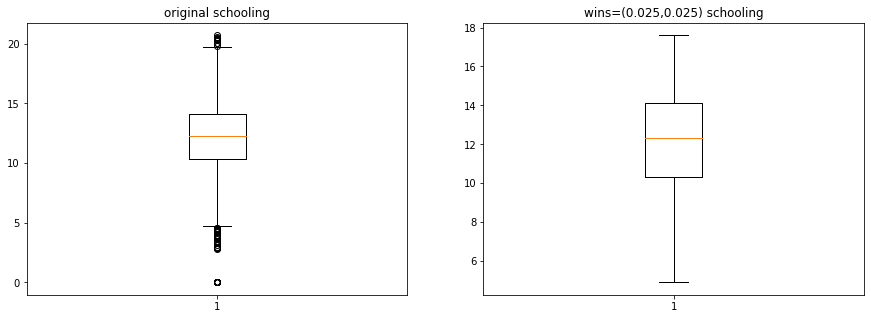

In [54]:
wins_dict = {}
test_wins(numerical_vars[0], lower_limit=.01, show_plot=True)
test_wins(numerical_vars[1], upper_limit=.04, show_plot=True)
test_wins(numerical_vars[2], upper_limit=.1, show_plot=True)
test_wins(numerical_vars[3], upper_limit=.0025, show_plot=True)
test_wins(numerical_vars[4], upper_limit=.135, show_plot=True)
test_wins(numerical_vars[5], lower_limit=.15, show_plot=True)
test_wins(numerical_vars[6], upper_limit=.19, show_plot=True)
test_wins(numerical_vars[7], upper_limit=.05, show_plot=True)
test_wins(numerical_vars[8], upper_limit=.15, show_plot=True)
test_wins(numerical_vars[9], lower_limit=.1, show_plot=True)
test_wins(numerical_vars[10], upper_limit=.1, show_plot=True)
test_wins(numerical_vars[11], lower_limit=.1, show_plot=True)
test_wins(numerical_vars[12], upper_limit=.105, show_plot=True)
test_wins(numerical_vars[13], upper_limit=.07, show_plot=True)
test_wins(numerical_vars[14], upper_limit=.1, show_plot=True)
test_wins(numerical_vars[15], upper_limit=.035, show_plot=True)
test_wins(numerical_vars[16], upper_limit=.05, show_plot=True)
test_wins(numerical_vars[17], lower_limit=.025, upper_limit=.005, show_plot=True)
test_wins(numerical_vars[18], upper_limit=0.025, lower_limit=0.025, show_plot=True)

In [55]:
# Defining cleaned dataset - winsorization_dataset
wins_df = df.iloc[:, 0:3]
for col in numerical_vars:
    wins_df[col] = wins_dict[col]

In [56]:
# Getting important information from the cleaned datatset
wins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [57]:
# Getting correlation of all the numerical columns with the target column - life_expectancy AFTER Winsorization
correlation_with_life_expectancy=wins_df.select_dtypes(include=np.number).corr()['life_expectancy']
correlation_with_life_expectancy

year                               0.170152
life_expectancy                    1.000000
adult_mortality                   -0.687861
infant_deaths                     -0.563381
alcohol                            0.391095
percentage_expenditure             0.488280
hepatitis_b                        0.267142
measles                           -0.338068
bmi                                0.563534
under_five_deaths                 -0.610118
polio                              0.568251
total_expenditure                  0.216047
diphtheria                         0.567987
hiv_aids                          -0.768689
gdp                                0.489997
population                        -0.073844
thinness_10_19_years              -0.509615
thinness_5_9_years                -0.527397
income_composition_of_resources    0.689731
schooling                          0.740942
Name: life_expectancy, dtype: float64

In [58]:
# Getting correlation of all the numerical columns with the target column - life_expectancy BEFORE Winsorization
corr_with_life_expectancy=df.select_dtypes(include=np.number).corr()['life_expectancy']
corr_with_life_expectancy

year                               0.170819
life_expectancy                    1.000000
adult_mortality                   -0.696390
infant_deaths                     -0.196769
alcohol                            0.388918
percentage_expenditure             0.381418
hepatitis_b                        0.170219
measles                           -0.157767
bmi                                0.556901
under_five_deaths                 -0.222738
polio                              0.458399
total_expenditure                  0.208844
diphtheria                         0.472211
hiv_aids                          -0.556703
gdp                                0.430461
population                        -0.029014
thinness_10_19_years              -0.468002
thinness_5_9_years                -0.462473
income_composition_of_resources    0.688662
schooling                          0.713054
Name: life_expectancy, dtype: float64

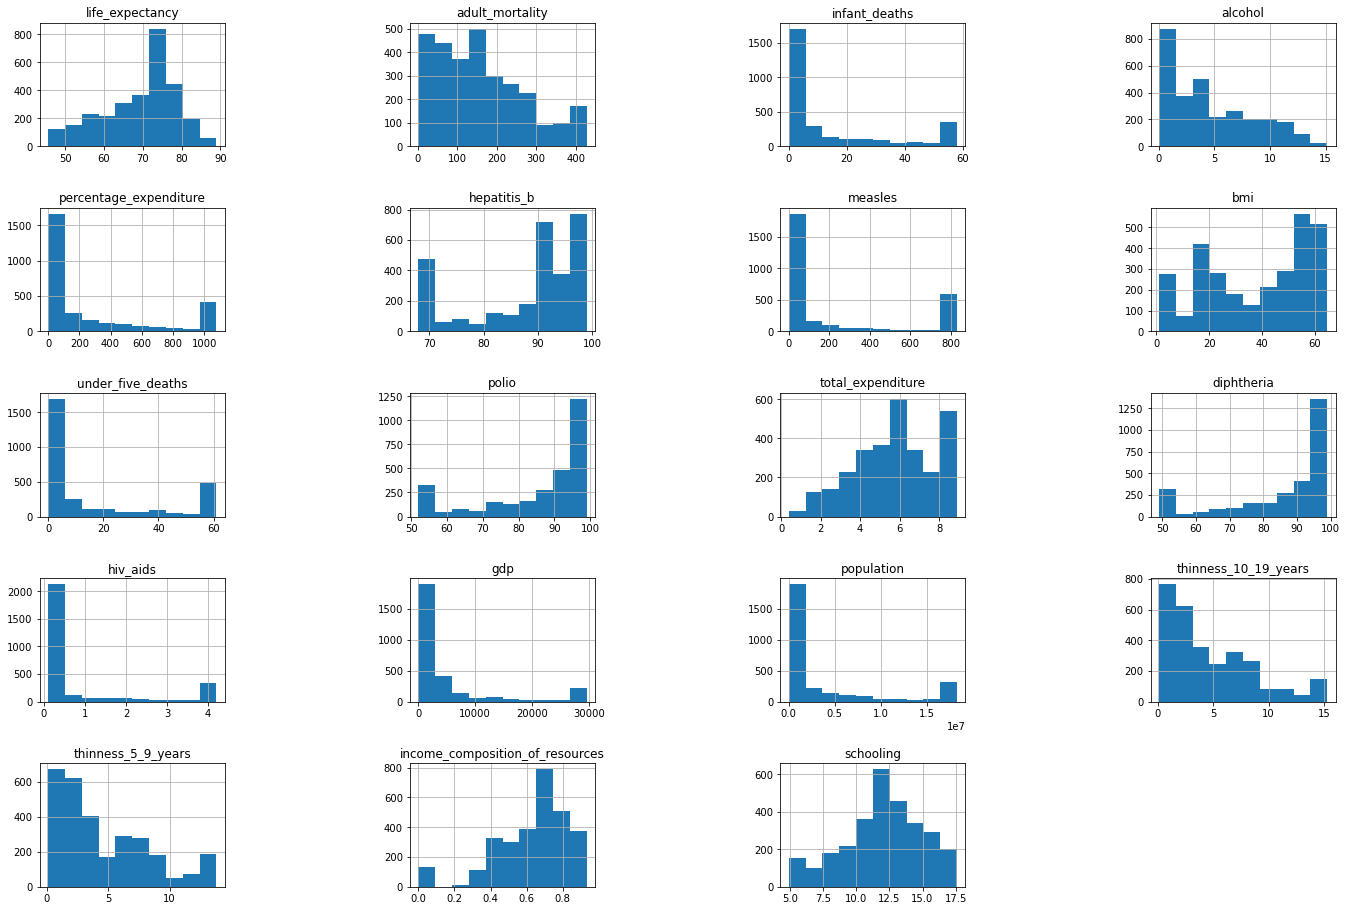

In [59]:
#Plotting histogram for all the numerical columns to check the effect of Winsorization on the columns
wins_df.hist(wins_df.columns[3:]) #Selecting all the numerical columns

# Adjustments to the plots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=3,
                    wspace=1,
                    hspace=0.5)
plt.show()

In [60]:
# Applying label encoder to all the categorical columns and dropping the original columns
labelencoder = LabelEncoder()
wins_df['country_encoded'] = labelencoder.fit_transform(wins_df['country'])
wins_df['year_encoded'] = labelencoder.fit_transform(wins_df['year'])
wins_df['status_encoded'] = labelencoder.fit_transform(wins_df['status'])
wins_df.drop(['country', 'year', 'status'], axis=1, inplace=True)
wins_df

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,hiv_aids,gdp,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling,country_encoded,year_encoded,status_encoded
0,65.0,263.0,58,0.01,71.279624,68.0,831,19.1,61,52.0,...,0.1,584.259210,18294611.0,15.3,13.8,0.479,10.1,0,15,1
1,59.9,271.0,58,0.01,73.523582,68.0,492,18.6,61,58.0,...,0.1,612.696514,327582.0,15.3,13.8,0.476,10.0,0,14,1
2,59.9,268.0,58,0.01,73.219243,68.0,430,18.1,61,62.0,...,0.1,631.744976,18294611.0,15.3,13.8,0.470,9.9,0,13,1
3,59.5,272.0,58,0.01,78.184215,68.0,831,17.6,61,67.0,...,0.1,669.959000,3696958.0,15.3,13.8,0.463,9.8,0,12,1
4,59.2,275.0,58,0.01,7.097109,68.0,831,17.2,61,68.0,...,0.1,63.537231,2978599.0,15.3,13.8,0.454,9.5,0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,45.6,428.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,4.2,454.366654,12777511.0,9.4,9.4,0.407,9.2,192,4,1
2934,45.6,428.0,26,4.06,0.000000,68.0,831,26.7,41,52.0,...,4.2,453.351155,12633897.0,9.8,9.9,0.418,9.5,192,3,1
2935,45.6,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,4.2,57.348340,125525.0,1.2,1.3,0.427,10.0,192,2,1
2936,45.6,428.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,4.2,548.587312,12366165.0,1.6,1.7,0.427,9.8,192,1,1


In [61]:
# Assigning values in `life_expectancy` column of wins_df to variable named target
target = wins_df['life_expectancy']
target

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    45.6
2934    45.6
2935    45.6
2936    45.6
2937    46.0
Name: life_expectancy, Length: 2938, dtype: float64

In [62]:
# Dropping `life_expectancy` column from cleaned dataset
wins_df.drop(['life_expectancy'], axis=1, inplace=True)
wins_df.shape

(2938, 21)

In [63]:
# Assigning values to X and y variables for building linear regression model
X = wins_df
y = target

In [64]:
#Dividing X_test with test ratio 0.2. Similar create y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 21), (588, 21), (2350, 1), (588, 1))

In [65]:
# Defining linear_regression model which is calling LinearRegression()
linear_regression = LinearRegression()

In [66]:
# Fitting out training datasets in the model
linear_regression.fit(X_train,y_train)

LinearRegression()

In [67]:
#Making predictions
linear_regression_pred = linear_regression.predict(X_test)

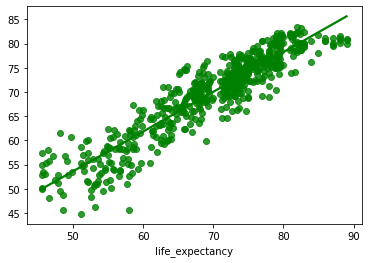

In [68]:
sns.regplot(x=y_test,y=linear_regression_pred,ci=None,color ='green');

In [69]:
len(y_test)
type(y_test)
y_test

,life_expectancy
775,72.7
527,46.0
553,78.9
2670,74.8
2047,75.3
...,...
2902,61.9
196,73.0
2452,69.1
2116,67.5


In [70]:
len(linear_regression_pred)
type(linear_regression_pred)
pred_df = pd.DataFrame(linear_regression_pred, columns =['predicted_value'])
pred_df

,predicted_value
0,71.380555
1,53.116114
2,77.309967
3,75.626459
4,76.298262
...,...
583,60.601737
584,69.198962
585,70.536138
586,70.908030


In [71]:
pred_df=pd.DataFrame({'Actual Value':[y_test],'Predicted Value':[linear_regression_pred]})

In [72]:
# MEAN SQUARE ERROR
mean_squared_error(y_test, linear_regression_pred)

13.551162689574214

In [73]:
# R SQUARE ERROR
r2_score(y_test, linear_regression_pred)

0.8491068997727439

In [74]:
# Performance of model
model_with_all_features = linear_regression.score(X_train, y_train)
model_with_all_features

0.856357370718382

### Selecting top 7 best features

In [75]:
# Selecting top 7 features using SelectKBest method
select = SelectKBest(score_func = f_regression, k=7) # Function to select top 7 features

# Fitting the function to the training and testing data for selecting best 7 features from them
z = select.fit_transform(X, y) 

print(z.shape) # Verifying that only 7 features exist

(2938, 7)


In [76]:
# Checking top 7 feature names
filter = select.get_support() # Function to get feature names - gives boolean value output
features = wins_df.columns
features[filter]

Index(['adult_mortality', 'under_five_deaths', 'polio', 'diphtheria',
       'hiv_aids', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [77]:
# Verifying the scores of the best features
Scores = pd.DataFrame({'columns': wins_df.columns,
                              'Scores': select.scores_})
Scores.sort_values(by=['Scores'], ascending=False)

,columns,Scores
11,hiv_aids,4240.420715
17,schooling,3573.902956
16,income_composition_of_resources,2664.162111
0,adult_mortality,2636.771205
7,under_five_deaths,1740.975104
8,polio,1400.200596
10,diphtheria,1398.280450
6,bmi,1366.274906
1,infant_deaths,1365.186587
15,thinness_5_9_years,1131.315871


In [78]:
# Keeping only top 7 features
X = wins_df[['adult_mortality', 'under_five_deaths', 'polio', 'diphtheria',
       'hiv_aids', 'income_composition_of_resources', 'schooling']]
X

,adult_mortality,under_five_deaths,polio,diphtheria,hiv_aids,income_composition_of_resources,schooling
0,263.0,61,52.0,65.0,0.1,0.479,10.1
1,271.0,61,58.0,62.0,0.1,0.476,10.0
2,268.0,61,62.0,64.0,0.1,0.470,9.9
3,272.0,61,67.0,67.0,0.1,0.463,9.8
4,275.0,61,68.0,68.0,0.1,0.454,9.5
...,...,...,...,...,...,...,...
2933,428.0,42,67.0,65.0,4.2,0.407,9.2
2934,428.0,41,52.0,68.0,4.2,0.418,9.5
2935,73.0,40,73.0,71.0,4.2,0.427,10.0
2936,428.0,39,76.0,75.0,4.2,0.427,9.8


In [79]:
# Split dataframe into train and test sets
train_new, test_new = train_test_split(X)

In [80]:
# Split into X & y new train and test sets with test ratio of 0.2
X_train_new , X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=1)

In [81]:
# Verifying if the above command successfully divided the training and testing data sets
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((2350, 7), (588, 7), (2350,), (588,))

In [82]:
# Since linear regression model is already defined before, directly fitting training datasets into the model

linear_regression.fit(X_train_new, y_train_new)

LinearRegression()

In [83]:
#Making predictions
LR_pred = linear_regression.predict(X_test_new)

In [84]:
# Computing mean_squared_error
MSE = mean_squared_error(y_test_new, LR_pred)
MSE

14.812663301164571

In [85]:
# Calculating Root Mean Square Error
RMSE = math.sqrt(MSE)
RMSE

3.848722294627734

In [86]:
# Computing R square error
r2_score(y_test_new, LR_pred)

0.8267726612165691

In [87]:
model_with_top_features = linear_regression.score(X_train_new, y_train_new)
print("Performance of model with all the features:" ,round(model_with_all_features*100, 2),"%")
print("Performance of model with top 7 features:" ,round(model_with_top_features*100,2),"%")

Performance of model with all the features: 85.64 %
Performance of model with top 7 features: 83.72 %
